In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
import xgboost as xgb
from xgboost import XGBRegressor


In [54]:
path= 'winequalityN.csv'
data= pd.read_csv(path)
print(data.shape,'\n',data.dtypes)

(6497, 13) 
 type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [55]:
df= data.copy()

In [56]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
df['quality'].describe().round(2)

count    6497.00
mean        5.82
std         0.87
min         3.00
25%         5.00
50%         6.00
75%         6.00
max         9.00
Name: quality, dtype: float64

In [58]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

<Figure size 640x480 with 0 Axes>

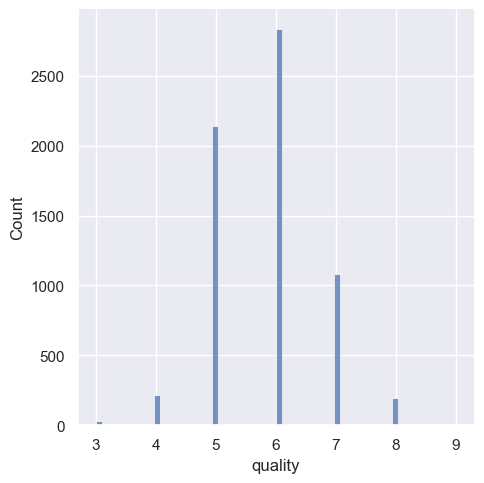

In [59]:
plt.figure()
sns.displot(df['quality'])
plt.show()

In [29]:
#very small samples of quality 3 and 8, could impose a problem during splitting or training
print('nb of samples with quality of 3:\n',df[df['quality'] == 3].shape)
print('nb of samples with quality of 8:\n',df[df['quality'] == 8].shape)

nb of samples with quality of 3:
 (6, 12)
nb of samples with quality of 8:
 (16, 12)


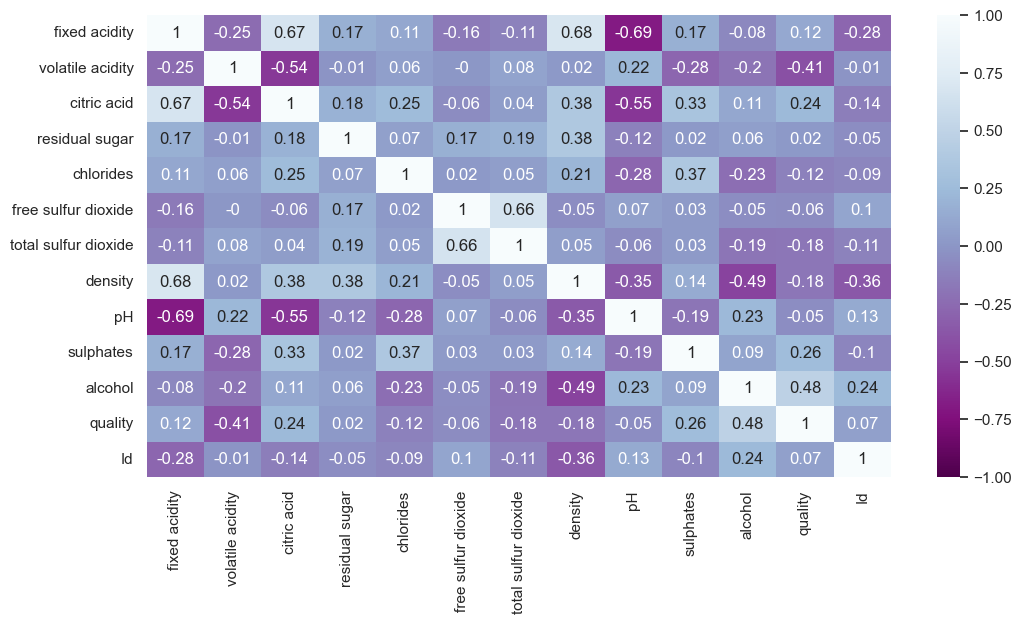

In [30]:
#checking the inputs correlations:
plt.figure(figsize= (12, 6))
sns.heatmap(
    data.corr().round(2),
    vmin= -1,
    vmax= 1,
    cmap= 'BuPu_r',
    annot= True
)
plt.show()
#it seems inputs aren't correlated with each other

In [31]:
#checking correlation x>y
df.corr()['quality'].sort_values()

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

In [32]:
#splitting the data
inputs= df.drop('quality', axis= 1)
target= df[['quality']]

x_train, x_test, y_train, y_test= tts(inputs, target, test_size= 0.2)

In [33]:
#designing the model:
xgboost= XGBRegressor(objective= 'count:poisson')

In [34]:
hyper_space= {
    'n_estimators': [200, 400],
    'max_depth': [3, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.6, 1],
    'colsample_bytree': [0.6, 1.0],
    'colsample_bylevel': [0.6, 1.0],
    'min_child_weight': [1, 5],
    'gamma': [0, 1, 2],
    'reg_alpha':[0, 0.2, 0.5],
    'reg_lambda': [1, 3, 5],
    'max_delta_step': [0, 3, 5],
}

In [35]:
cv= GridSearchCV(estimator= xgboost,
    param_grid= hyper_space,
    scoring= 'neg_mean_poisson_deviance',
    refit= 'neg_mean_poisson_deviance',
    cv= 5,
    verbose= 4
)

In [36]:
cv.fit(x_train, y_train)

Fitting 5 folds for each of 23328 candidates, totalling 116640 fits
[CV 1/5] END colsample_bylevel=0.6, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=-0.060 total time=   0.0s
[CV 2/5] END colsample_bylevel=0.6, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=-0.077 total time=   0.0s
[CV 3/5] END colsample_bylevel=0.6, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=-0.062 total time=   0.0s
[CV 4/5] END colsample_bylevel=0.6, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6;, score=-0.076 total time=   0.0s
[CV 5/5]

KeyboardInterrupt: 